In [413]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
from numpy import linalg as LA

In [414]:
start, end = 0, 1
A = np.array([[3, 2], [7, 1]])

In [415]:
A = np.array([[3, 2], [7, 1]])
w,v = LA.eig(A)
print (w)

[ 5.87298335 -1.87298335]


In [416]:
def phi1(x): 
    return 2 * ((x + 1) ** 0.5 - 1)
def phi2(x):
    return np.log(x + 1)
def der_phi1(x):
    return (1 / (x + 1))
def der_phi2(x):
    return 1/(x+1)**0.5

In [417]:
def RP(x):
    f = np.empty(2)
    f[0] = der_phi1(x) + A[0][0]*phi1(x) + A[0][1]*phi2(x)
    f[1] = der_phi2(x) + A[1][0]*phi1(x) + A[1][1]*phi2(x)
    return f

In [418]:
def im_Euler(N,U0):
    x = np.linspace(start, end, N + 1)
    vecfunct = np.zeros((N + 1, 2))

    vecfunct[0] = U0
    tau = (end - start) / N
    
    def F(x,u):
        f = np.empty(2)
        f[0] = RP(x)[0] - A.dot(u)[0]
        f[1] = RP(x)[1] - A.dot(u)[1]
        return np.array(f)
    
    for i in range(0,N):
         vecfunct[i+1] = vecfunct[i]+ tau/2 *(F(tau*i, vecfunct[i]) + F(tau*(i+1),vecfunct[i] + tau*F(tau*i, vecfunct[i])))
        #vecfunct[i+1] = vecfunct[i]+ tau/2 *(F(x[i], vecfunct[i]) + F(x[i + 1],vecfunct[i] + tau*F(x[i], vecfunct[i])))
                #f[i+1] = f[i]+ tau/2 *(funct_sin(tau*i,f[i]) + funct_sin(tau*(i+1),f[i] + tau*funct_sin(tau*i,f[i])))
    return vecfunct

In [419]:
def Adams(N,U0):
    vecfunct = np.zeros((N + 1, 2))

    vecfunct[0] = U0
    tau = (end - start) / N
    
    def F(x,u):
        f = np.empty(2)
        f[0] = RP(x)[0] - A.dot(u)[0]
        f[1] = RP(x)[1] - A.dot(u)[1]
        return f
    
    for i in range(1, 4):
            k_1 = tau * F(tau * (i - 1), vecfunct[i - 1])
            k_2 = tau * F(tau * (i - 1) + tau/2,vecfunct[i - 1]+ k_1/2)
            k_3 = tau * F(tau * (i - 1) + tau/2,vecfunct[i - 1] + k_2/2)
            k_4 = tau * F(tau * (i - 1) + tau,vecfunct[i - 1] + k_3)
            vecfunct[i] = vecfunct[i - 1] + (k_1 + 2 * k_2 + 2*k_3 + k_4) / 6
            
    for i in range(3,N):
            vecfunct[i + 1] = vecfunct[i] + tau/24 * (55 * F(tau * i,vecfunct[i]) - 59*F(tau * (i - 1),vecfunct[i - 1]) + 37 * F(tau * (i - 2), vecfunct[i - 2]) - 9 * F(tau * (i - 3),vecfunct[i - 3]))
                        
    return vecfunct

In [420]:
def err_E(U0):
    plt.xlabel('x')
    plt.ylabel('y')
    t = np.linspace(start, end, 320)
    plt.grid()
    
    count = 10
    N = 5 
    mas_error = np.zeros(count)
    tau =(end - start) / N
    
    for i in range(count):
        x_h = np.linspace(start, end, N + 1)
        f = im_Euler(N, U0)
        U = np.empty(N + 1)
        error = np.empty(N + 1)
        U = f[:,0]
        
#         for j in range(N + 1):
#             error[j] = np.fabs(U[j] - phi1(x_h[j]))
        error = np.fabs(U - phi1(x_h))
        mas_error[i] = np.max(error)
        
        plt.plot(x_h, U, 'b')
        N = 2 * N
        
    for i in range(count - 1):
        print('order =', np.log2(mas_error[i] / mas_error[i + 1]))
        
    plt.plot(t, phi1(t), 'r')
    plt.show()
    return mas_error


In [421]:
def err_A(U0):
    plt.xlabel('x')
    plt.ylabel('y')
    t = np.linspace(start, end, 320)
    plt.grid()
    
    count = 10
    N = 5 
    mas_error = np.zeros(count)
    tau =(end - start) / N
    
    for i in range(count):
        x_h = np.linspace(start, end, N + 1)
        f = Adams(N, U0)
        U = np.empty(N + 1)
        error = np.empty(N + 1)
        U = f[:, 1]
        
        for j in range(N + 1):
            error[j] = np.fabs(U[j] - phi2(x_h[j]))
        mas_error[i] = np.max(error)

        plt.plot(x_h, U, 'b')
        N = 2 * N
        
    for i in range(count - 1):
        print('order =', np.log2(mas_error[i] / mas_error[i + 1]))
    plt.plot(t, phi2(t), 'r')
    plt.show()
    return mas_error


In [424]:
print(im_Euler(5, [0,0]))

[[0.         0.        ]
 [0.17706471 0.18314241]
 [0.33054299 0.37401061]
 [0.45954683 0.58230671]
 [0.56095985 0.82204934]
 [0.6288856  1.11292517]]


order = -0.030279561993955293
order = -0.014231296561655877
order = -0.004102617538201137
order = -0.0010881610429320742
order = -0.00027967339736016683
order = -7.086493738877464e-05
order = -1.783418441929693e-05
order = -4.473269381460441e-06
order = -1.1201565566818023e-06


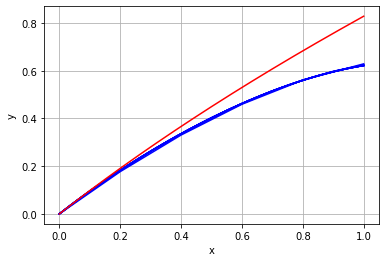

In [425]:
U0 = [0, 0]
errorEuler = err_E(U0)

order = 0.002034471427188258
order = -0.0030891308585276668
order = -4.713349290811272e-05
order = -2.7544170476201712e-06
order = -1.6768521814401294e-07
order = -1.0248117803300988e-08
order = -6.315888510010005e-10
order = -3.91615686670185e-11
order = -2.4523831599975948e-12


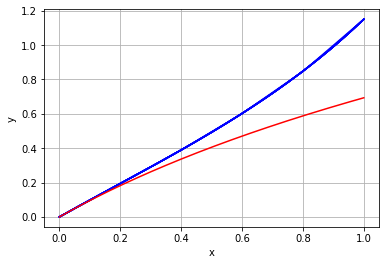

In [426]:
U0 = [0, 0]
errorAdams = err_A(U0)